# Car sales price prediction

**Author:** Mariana Khachatryan
**Email:** marishnem@gmail.com
**Date:** 2024-12-12

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score

In [190]:
#I have defined the dat class in Data_prep.py code to get data from file and prepare for analysis
from Data_prep import dat

In [191]:
#In this analysis we are using the following data https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
#we are trying to predict car prices based on different features
df=pd.read_csv("Car_details_v3_cleaned.csv",index_col=0)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6267 non-null   int64  
 1   selling_price                 6267 non-null   int64  
 2   km_driven                     6267 non-null   int64  
 3   mileage                       6267 non-null   float64
 4   engine                        6267 non-null   float64
 5   max_power                     6267 non-null   float64
 6   fuel_Petrol                   6267 non-null   bool   
 7   seller_type_Individual        6267 non-null   bool   
 8   transmission_Manual           6267 non-null   bool   
 9   owner_Second Owner            6267 non-null   bool   
 10  owner_Third and above owners  6267 non-null   bool   
 11  seat_category_more than 5     6267 non-null   bool   
dtypes: bool(6), float64(3), int64(3)
memory usage: 379.4 KB


In [193]:
df=df.astype(float)

In [194]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2013.599968,4.504369e+05,73702.630445,19.699196,1399.672730,84.586747,0.459550,0.908409,0.938886,0.284666,0.097974,0.191320
std,3.679598,2.541364e+05,47875.436535,3.831312,460.545875,25.625692,0.498401,0.288471,0.239558,0.451291,0.297303,0.393371
min,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,40000.000000,17.000000,1197.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.000000e+05,70000.000000,19.700000,1248.000000,81.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.050000e+05,100000.000000,22.540000,1498.000000,98.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,1.295000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
df_corr=df.corr()
df_corr["selling_price"].nsmallest(1)

fuel_Petrol   -0.322558
Name: selling_price, dtype: float64

In [196]:
df_corr["selling_price"].nlargest(2)

selling_price    1.000000
year             0.629347
Name: selling_price, dtype: float64

<Axes: xlabel='max_power', ylabel='selling_price'>

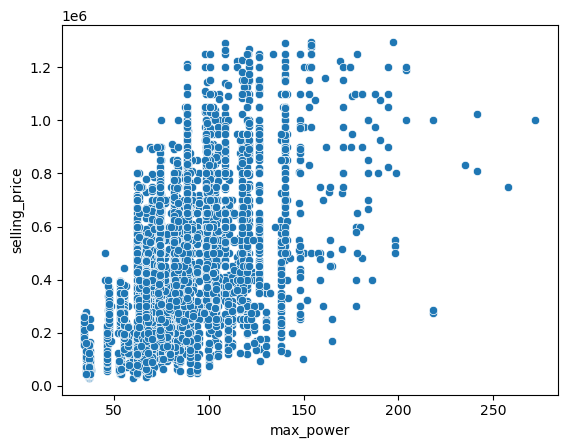

In [197]:
#The highest correlation of "selling_price" is with "max_power" feature
sns.scatterplot(data=df,y="selling_price",x="max_power")

C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


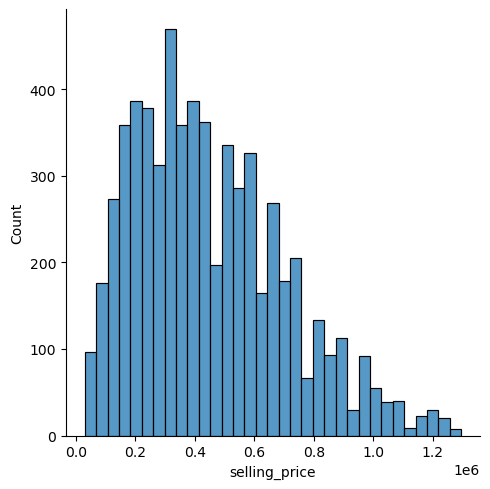

In [198]:
sns.displot(data=df,x="selling_price")

In [199]:
X=df.drop("selling_price",axis=1)
y=df["selling_price"]

In [200]:
# Step 1: Split into training (60%) and temporary set (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split temporary set into validation (50% of temp, i.e., 20% of original) and test (50% of temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [201]:
X_test

,year,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
3584,2011.0,250000.0,12.80,2494.0,102.00,0.0,1.0,1.0,1.0,0.0,1.0
1472,2015.0,120000.0,23.59,1364.0,67.05,0.0,1.0,1.0,0.0,0.0,0.0
4611,2014.0,101200.0,15.30,2956.0,83.83,0.0,1.0,1.0,1.0,0.0,1.0
3384,2017.0,29000.0,20.51,998.0,67.00,1.0,1.0,0.0,0.0,0.0,0.0
7691,2006.0,198000.0,18.90,998.0,67.10,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7992,2012.0,93000.0,20.77,1248.0,88.76,0.0,1.0,1.0,0.0,0.0,1.0
5233,2018.0,25000.0,20.30,1086.0,68.00,1.0,1.0,1.0,0.0,0.0,0.0
1976,2018.0,30000.0,21.63,998.0,67.04,1.0,1.0,1.0,0.0,0.0,0.0
7464,2015.0,136000.0,19.01,1461.0,108.45,0.0,1.0,1.0,0.0,0.0,0.0


In [202]:
#In order not to have the label in a very different scale than features, we will scale labels by dividing by 10^5
units=100000
y_train=y_train/units
y_val=y_val/units
y_test=y_test/units

In [203]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2013.599968,4.504369e+05,73702.630445,19.699196,1399.672730,84.586747,0.459550,0.908409,0.938886,0.284666,0.097974,0.191320
std,3.679598,2.541364e+05,47875.436535,3.831312,460.545875,25.625692,0.498401,0.288471,0.239558,0.451291,0.297303,0.393371
min,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,40000.000000,17.000000,1197.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.000000e+05,70000.000000,19.700000,1248.000000,81.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.050000e+05,100000.000000,22.540000,1498.000000,98.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,1.295000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
type(y_test)

pandas.core.series.Series

In [205]:
y_test.shape

(1254,)

In [206]:
type(X_test)

pandas.core.frame.DataFrame

In [207]:
X_test.shape

(1254, 11)

# Base model

In [208]:
lr_model=LinearRegression()
#lr_model=ElasticNet()

In [209]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [210]:
lr_preds=lr_model.predict(X_val)

In [211]:
lr_preds

array([6.76565306, 2.35303651, 5.60167722, ..., 5.23853589, 9.34140236,
       5.24798716])

In [212]:
mean_absolute_error(y_val,lr_preds)

1.0368536039753984

In [213]:
# Calculate MAPE
mean_absolute_percentage_error(y_val,lr_preds)*100 #multiply by 100 to express in percentage

33.49377415837243

In [214]:
y_val_list=y_val.tolist()

In [215]:
residuals=[lr_preds[i]-y_val_list[i] for i in range(0,len(y_val_list))]

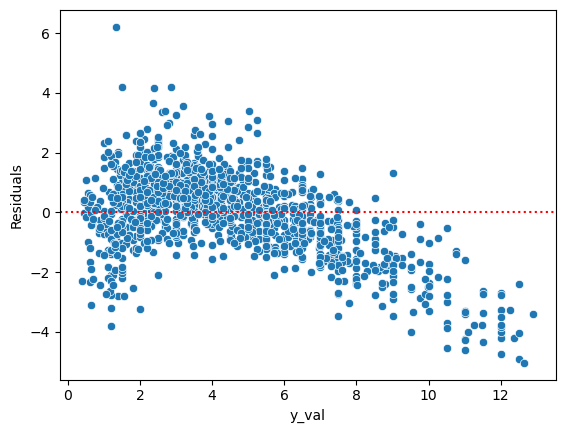

In [216]:
#Checking Homoscedasticity
sns.scatterplot(x=y_val_list,y=residuals)
plt.ylabel("Residuals")
plt.xlabel("y_val")
plt.axhline(y=0,color='r',linestyle=':')
plt.savefig("Plots/Homoscedasticity.png",bbox_inches="tight")
# There is a difference between variations in one part of 
#the data and the other

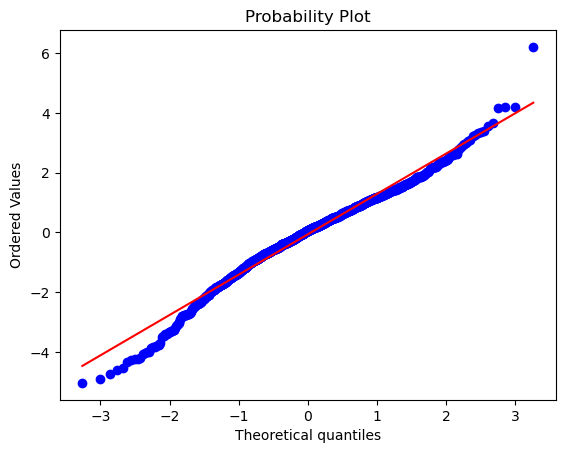

In [217]:
#Checking Normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.savefig("Plots/Normality.png",bbox_inches="tight")
plt.show()

#distribution is normal since points lie approximately at 45 degree reference line

# Trying other regression models

In [218]:
def run_model(model,X_train,y_train,X_val,y_val):

    #Model fit
    model.fit(X_train,y_train)

    #Model predict
    preds=model.predict(X_val)
    rmse=np.sqrt(mean_squared_error(y_val,preds))
    mae=mean_absolute_error(y_val,preds)
    mape=mean_absolute_percentage_error(y_val,preds)*100
    r2 = r2_score(y_val,preds)
    print("MAE:{}".format(mae))
    print("RMSE:{}".format(rmse))
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R² Score:", r2)

### Polynomial regression

In [219]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [220]:
# Define a pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),  # Add polynomial features
    ('regressor', LinearRegression())         # Linear regression model
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [ 2, 3] # Polynomial degrees to try
}

# Perform GridSearchCV
grid = GridSearchCV(pipeline, param_grid)

In [221]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.815852392959522
RMSE:1.1182391670242362
Mean Absolute Percentage Error (MAPE): 22.618837009983736
R² Score: 0.8125976731854379


### KNN regressor

In [222]:
from sklearn.neighbors import KNeighborsRegressor

In [223]:
knn=KNeighborsRegressor()
param_grid={"n_neighbors":[1,5,10]}
grid=GridSearchCV(knn,param_grid)

In [224]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:1.4091776025538707
RMSE:1.9836701928935017
Mean Absolute Percentage Error (MAPE): 43.59169493355138
R² Score: 0.4102818224691358


In [225]:
#High variance with low k, higher k high bias

### Support Vector Regressor

In [226]:
from sklearn.svm import SVR

In [227]:
svr=SVR()
param_grid={"C":[1,10,100],"gamma":["auto","scale"]} #C is inversely proportional to reg. par.
grid=GridSearchCV(svr,param_grid)

In [228]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:1.5283338271226141
RMSE:2.1143821870001833
Mean Absolute Percentage Error (MAPE): 54.345674500210464
R² Score: 0.3300034563417522


In [229]:
grid.best_params_

{'C': 10, 'gamma': 'auto'}

### Random Forest Regression

In [230]:
from sklearn.ensemble import RandomForestRegressor

In [231]:
rfr=RandomForestRegressor(n_estimators=10)

In [232]:
run_model(rfr,X_train,y_train,X_val,y_val)

MAE:0.6696740106487288
RMSE:0.9681459103335952
Mean Absolute Percentage Error (MAPE): 17.874403296468806
R² Score: 0.8595288266504522


### Gradient Boost Regressor

In [233]:
from sklearn.ensemble import GradientBoostingRegressor

In [234]:
gboost=GradientBoostingRegressor()

In [235]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.2,0.3],"max_depth":[3,5]}

In [236]:
grid=GridSearchCV(gboost,param_grid,scoring='neg_mean_squared_error', cv=5)

In [237]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.6069004268788752
RMSE:0.8616824417641652
Mean Absolute Percentage Error (MAPE): 16.762031888497905
R² Score: 0.888724368735938


In [238]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

### XGBoost

In [239]:
import xgboost as xgb

In [240]:
xg_reg = xgb.XGBRegressor()

In [241]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.2,0.3],"max_depth":[3,5]} # Number of trees (boosting rounds), Step size shrinkage, Maximum depth of a tree
grid=GridSearchCV(xg_reg,param_grid, scoring='neg_mean_squared_error', cv=5)

In [242]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.6110303072552697
RMSE:0.8887762978961898
Mean Absolute Percentage Error (MAPE): 16.84229882107585
R² Score: 0.8816166820015026


In [243]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}

### PCA

In [244]:
from sklearn.decomposition import PCA

##### ElasticNet

In [245]:
# Create the pipeline with make_pipeline
pipeline = make_pipeline(
PCA(n_components=5),         # Reduces dimensionality to 5 components
ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)  # ElasticNet with regularization
)

In [246]:
# Define parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [3,4,5, 7, 10],
    'elasticnet__alpha': [0.1, 0.5, 1.0],
    'elasticnet__l1_ratio': [0.2, 0.5, 0.8]
}

In [247]:
# Set up GridSearchCV with make_pipeline
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)

In [248]:
# Fit GridSearchCV
run_model(grid_search,X_train,y_train,X_val,y_val)

MAE:1.0510377152559314
RMSE:1.3877624188807933
Mean Absolute Percentage Error (MAPE): 33.806522059583685
R² Score: 0.711373751515784


In [249]:
grid_search.best_params_

{'elasticnet__alpha': 0.1,
 'elasticnet__l1_ratio': 0.2,
 'pca__n_components': 10}

##### XGBoost

In [250]:
from xgboost import XGBRegressor

In [251]:
pipeline = make_pipeline(
PCA(),       
XGBRegressor()
)

In [252]:
# Define parameter grid for GridSearchCV
param_grid = {
#    'pca__n_components': [3,4,5, 7, 10], #number of components to include
    'pca__n_components': [0.8,0.95,None],#Percent of variance to keep,None keeps 100% variance
    'xgbregressor__n_estimators': [50,100],
    'xgbregressor__learning_rate': [0.1,0.2, 0.5],
    'xgbregressor__max_depth': [3,5]
}

In [253]:
# Set up GridSearchCV with make_pipeline
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)

In [254]:
# Fit GridSearchCV
run_model(grid_search,X_train,y_train,X_val,y_val)

MAE:0.7514138372169183
RMSE:1.0618222722521802
Mean Absolute Percentage Error (MAPE): 20.771852060368442
R² Score: 0.8310301413040497


In [255]:
grid_search.best_params_

{'pca__n_components': None,
 'xgbregressor__learning_rate': 0.1,
 'xgbregressor__max_depth': 5,
 'xgbregressor__n_estimators': 100}

In [256]:
# Get the best pipeline
best_pipeline = grid_search.best_estimator_
# Access the PCA step
best_pca = best_pipeline.named_steps['pca']

In [257]:
 best_pca.n_components_

11

In [258]:
best_pca.explained_variance_ratio_

array([9.99919845e-01, 7.99734504e-05, 1.72286463e-07, 6.37786954e-09,
       2.28615536e-09, 8.71967294e-11, 4.81665641e-11, 3.56835663e-11,
       2.97625182e-11, 2.66358160e-11, 2.19732611e-11])

In [259]:
ls=best_pca.explained_variance_ratio_

In [260]:
ls.sum()

0.9999999999999999

In [261]:
#With keeping 100% varince PCA still applies a transformation to the data, converting it into its principal component space, but the number of dimensions remains the same as the original dataset.
# We get worse performance with XGBRegreesor when combined with PCA, this is because 
# with PCA we are loosing non-linear patterns and interactions that are critical for XGBoost's performance


# Evaluating XGBoost the best model on the test set

In [262]:
y_test_pred=grid.predict(X_test)

In [263]:
rmse_best=np.sqrt(mean_squared_error(y_test,y_test_pred))
mae_best=mean_absolute_error(y_test,y_test_pred)
mape_best=mean_absolute_percentage_error(y_test,y_test_pred)*100
r2_best = r2_score(y_test,y_test_pred)
print("MAE:{}".format(mae_best))
print("RMSE:{}".format(rmse_best))
print("Mean Absolute Percentage Error (MAPE):", mape_best)
print("R² Score:", r2_best)

MAE:0.5992548535599321
RMSE:0.8569772564149004
Mean Absolute Percentage Error (MAPE): 15.672826792697123
R² Score: 0.8825394347355636


# Visualizations with SHAP

In [264]:
#SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory
#SHAP shows the contribution or the importance of each feature on the prediction of the model
import shap

In [265]:
feature_names=df.drop("selling_price",axis=1).columns

In [266]:
feature_names

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Petrol',
       'seller_type_Individual', 'transmission_Manual', 'owner_Second Owner',
       'owner_Third and above owners', 'seat_category_more than 5'],
      dtype='object')

In [267]:
X_test_df = pd.DataFrame(X_test, columns=feature_names)

In [268]:
# Fits the explainer
explainer = shap.Explainer(grid.predict,X_test_df)

In [269]:
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_df)

PermutationExplainer explainer: 1255it [04:17,  4.67it/s]                                                              


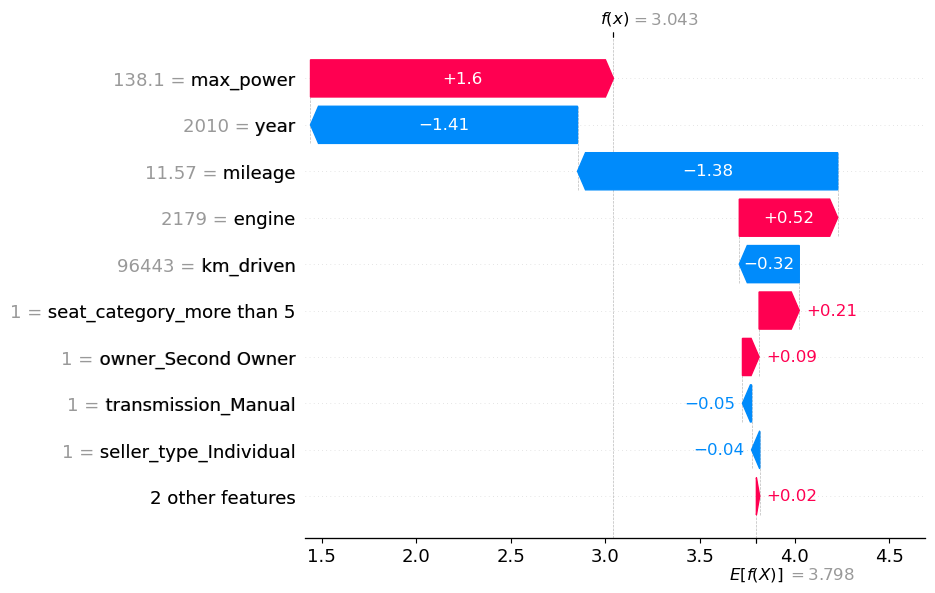

In [281]:
shap.plots.waterfall(shap_values[6])
#shap.plots.waterfall(shap_values[1],show=False)
#plt.savefig("Plots/Waterfall_onerow.png",bbox_inches="tight")

In [271]:
#x-axis has the values of car sales price. x is the chosen observation,
#f(x) is the predicted value of the model, given input x and E[f(x)] is the the mean of all predictions
#The SHAP value for each feature in this observation is given by the length of the bar
#The sum of all SHAP values will be equal to E[f(x)] — f(x).

#### Bar plot

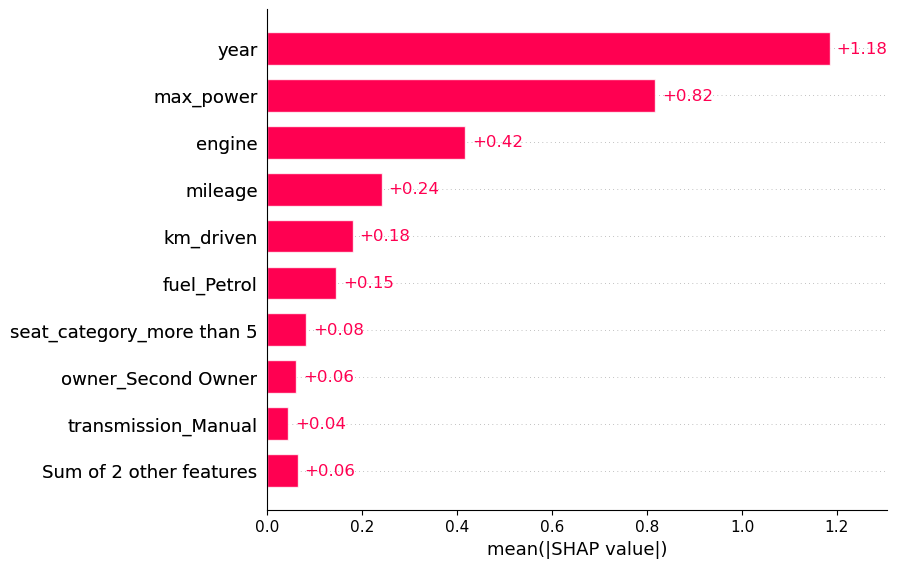

In [272]:
shap.plots.bar(shap_values)
#shap.plots.bar(shap_values,show=False)
#plt.savefig("Plots/Feature_shapvalues.png",bbox_inches="tight")
#Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value.

In [273]:
# Here the features are ordered from the highest to the lowest effect on the prediction.
#It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

#### Summary plot: violin

In [274]:
#shap.plots.beeswarm(shap_values)

In [275]:
#The features are ordered by their effect on prediction, 
#We can see how higher and lower values of the feature will affect the result.

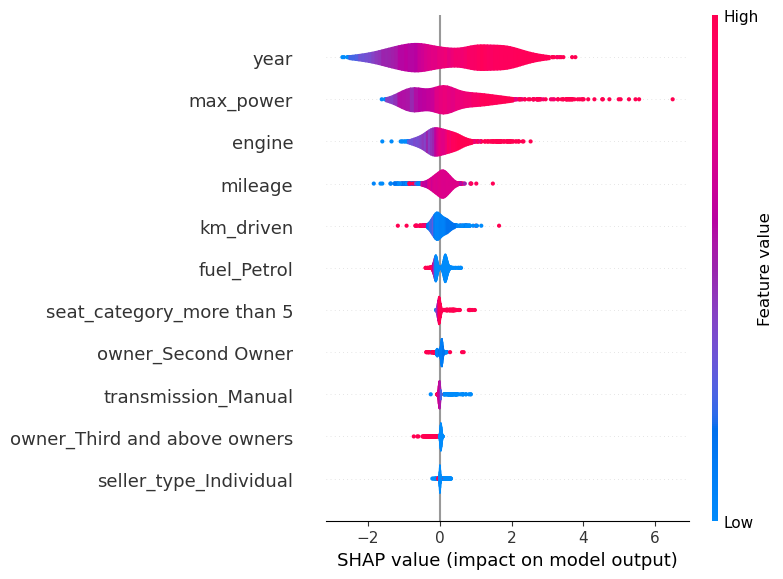

In [276]:
shap.summary_plot(shap_values, plot_type='violin',show=False)
#plt.savefig("Plots/Feature_shapvalues_violin.png")